In [35]:
import rebound
import reboundx
import numpy as np
tmax = 1.e7
taue = -1.e3
dt = 1.e-2
P = 1.57

In [30]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1.e-5,a=1.,e=0.1,f=0.3)
sim.add(m=1.e-5,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

sim.integrator="whfast"
sim.dt = ps[1].P*dt

E0 = sim.calculate_energy()
Nout = 1000
EerrNoDamp = np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    EerrNoDamp[i] = abs((Ef-E0)/E0)

CPU times: user 12.1 s, sys: 14.2 ms, total: 12.1 s
Wall time: 12.1 s


In [36]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1.e-5,a=1.,e=0.1,f=0.3)
sim.add(m=1.e-5,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

rebx = reboundx.Extras(sim)
damping = rebx.add("modify_orbits_forces")

ps[1].params["tau_e"] = taue
ps[2].params["tau_e"] = taue

sim.integrator="whfast"
sim.dt = ps[1].P*dt

damping.params["Edissipated_WHFAST"] = 0.
E0 = sim.calculate_energy()
Nout = 1000
EerrWHFASTLT = np.zeros(Nout)
#e1,e2,inc1,inc2, Eerr = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
#a1,a2,inc1,inc2, Eerr = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    EerrWHFASTLT[i] = abs((Ef-(E0+damping.params["Edissipated_WHFAST"]))/E0)

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 4min 33s, sys: 274 ms, total: 4min 34s
Wall time: 4min 34s


In [32]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1.e-5,a=1.,e=0.1,f=0.3)
sim.add(m=1.e-5,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

rebx = reboundx.Extras(sim)
damping = rebx.add("modify_orbits_forces")

ps[1].params["tau_e"] = taue
ps[2].params["tau_e"] = taue

sim.integrator="whfast"
sim.dt = ps[1].P*dt
print(sim.dt)
rebx.integrator="implicit_midpoint"
damping.force_as_operator = 1
damping.operator_order = 1

damping.params["Edissipated"] = 0.
E0 = sim.calculate_energy()
Nout = 1000
EerrIMLT = np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    EerrIMLT[i] = abs((Ef-(E0+damping.params["Edissipated"]))/E0)

0.06283153891488669


/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: 10 iterations in integrator_implicit_midpoint.c failed to converge. This is typically because the perturbation is too strong for the current implementation.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 1min 22s, sys: 163 ms, total: 1min 23s
Wall time: 1min 23s


In [33]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1.e-5,a=1.,e=0.1,f=0.3)
sim.add(m=1.e-5,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

rebx = reboundx.Extras(sim)
damping = rebx.add("modify_orbits_forces")

ps[1].params["tau_e"] = taue
ps[2].params["tau_e"] = taue

sim.integrator="whfast"
sim.dt = ps[1].P*dt
print(sim.dt)
rebx.integrator="rk4"
damping.force_as_operator = 1
damping.operator_order = 1

damping.params["Edissipated"] = 0.
E0 = sim.calculate_energy()
Nout = 1000
Eerrrk4LT = np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    Eerrrk4LT[i] = abs((Ef-(E0+damping.params["Edissipated"]))/E0)

0.06283153891488669
CPU times: user 40.8 s, sys: 61.1 ms, total: 40.9 s
Wall time: 40.9 s


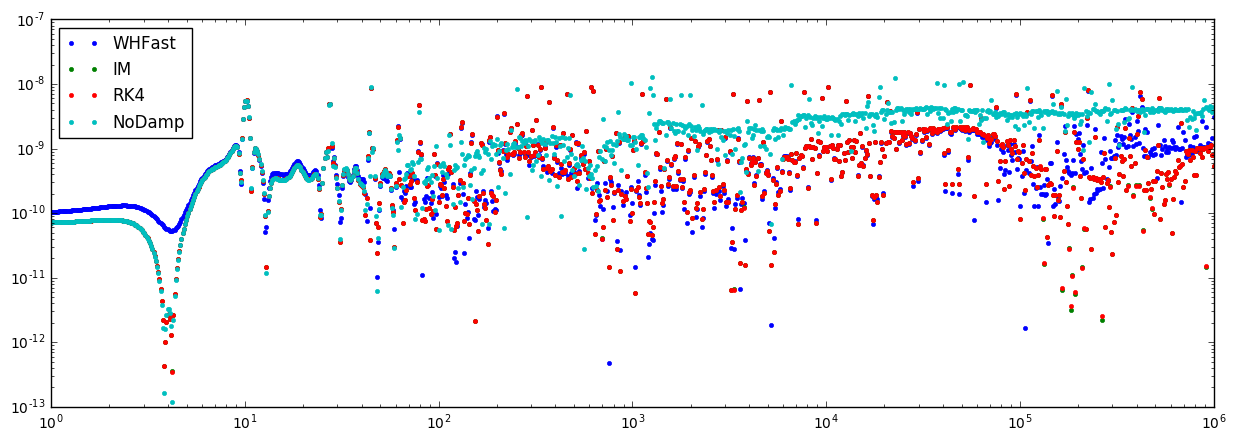

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,EerrWHFASTLT, '.', label='WHFast')
ax.plot(times,EerrIMLT, '.', label='IM')
ax.plot(times,Eerrrk4LT, '.', label='RK4')
ax.plot(times,EerrNoDamp, '.', label='NoDamp')
ax.legend(loc='upper left')

Now let's plot it on a linear-log scale to check whether we get the expected exponential behavior.  We'll also overplot the expected exponential decays for comparison.

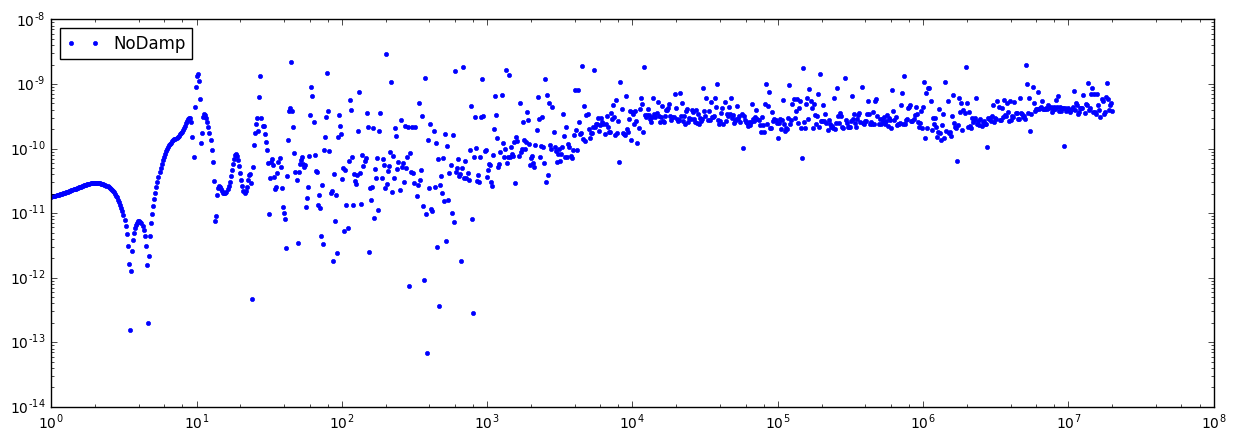

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.plot(times,EerrWHFASTLT, '.', label='WHFast')
#ax.plot(times,EerrIMLT, '.', label='IM')
#ax.plot(times,Eerrrk4LT, '.', label='RK4')
ax.plot(times,EerrNoDamp, '.', label='NoDamp')
ax.legend(loc='upper left')

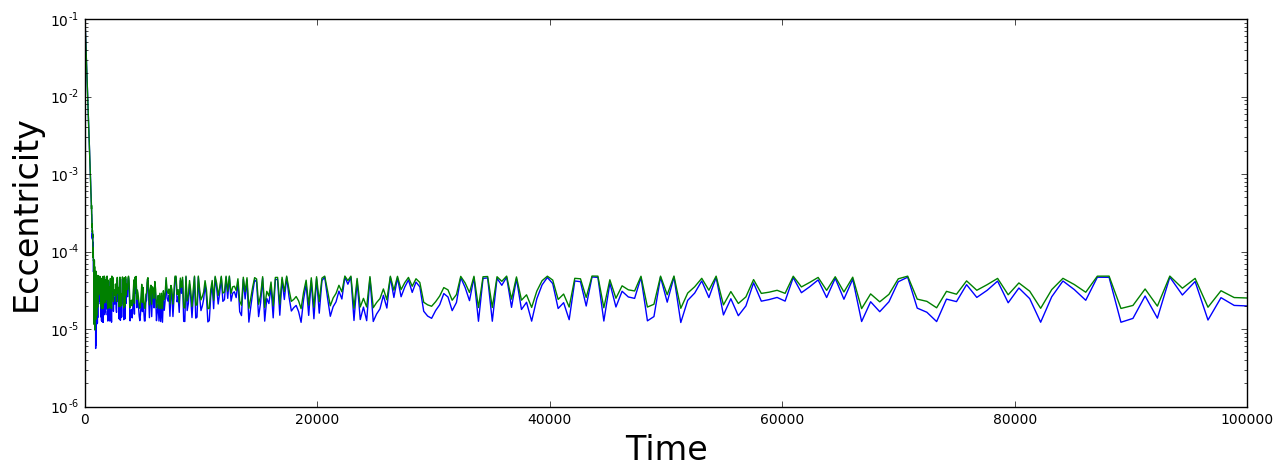

In [7]:
#e1pred = [e0*np.e**(t/ps[1].params["tau_e"]) for t in times]
#e1pred = [e0*np.e**(t/ps[1].params["tides_synchronous_tau_e"]) for t in times]

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(times,e1)
plt.plot(times,e2)
#plt.plot(times,e1pred, 'r--')
plt.axes().set_xlabel("Time", fontsize=24)
plt.axes().set_ylabel("Eccentricity", fontsize=24)

In [31]:
damping.params["Edissipated_WHFAST"]

5.835668810701685e-06

In [60]:
damping.params["Edissipated"]

AttributeError: REBOUNDx Error: Parameter 'Edissipated' not found.

In [53]:
sim.calculate_energy()

-1.3941394915499488e-05

In [54]:
E0

-1.380198096662525e-05

In [44]:
damping.params["Edissipated"] = 0.
E0 = sim.calculate_energy()
sim.step()
Ef = sim.calculate_energy()

In [45]:
E0

-1.880245255081472e-05

In [46]:
Ef

-1.8802453548821506e-05

In [25]:
damping.params["Edissipated"]

-1.898436943495315e-07

In [48]:
Ef-E0

-9.980067851777727e-13

In [49]:
E0 + damping.params["Edissipated"]

-1.8802453548821578e-05

In [50]:
(E0 + damping.params["Edissipated"]-Ef)/E0

3.784121639295307e-15

In [13]:
(E0 + damping.params["Edissipated"]-Ef)/E0

-5.3078542944363314e-08

In [22]:
sim.step()
Ef = sim.calculate_energy() + damping.params["Edissipated"]

In [23]:
Ef

-1.8808002243190104e-05

In [24]:
(E0 + 2*damping.params["Edissipated"]-Ef)/E0

1.2293251250055702e-05

In [25]:
(E0 + damping.params["Edissipated"]-Ef)/E0

-0.00014143232346111478

In [7]:
sim.step()
Ef = sim.calculate_energy() + damping.params["Edissipated"]